## Comparing the Online Responses of Two Presidents during 2020
David S. White\
dswhite2012@gmail.com

**disclaimer:** This project is intended purely for educational purposes

### Libraries

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random 
sns.set()

### Load .csv to data frame

In [2]:
# load data
obama_df = pd.read_csv('obama_2020.csv')
trump_df = pd.read_csv('trump_2020.csv')

In [3]:
# check
obama_df.text[1]

'If you believe in a more just, more generous, more democratic America, now is the time to fight for it. Here’s a terrific way to register voters, organize communities, and ramp up turnout in the battleground states that will decide this election: http://votesaveamerica.com/adopt'

### Number of Posts

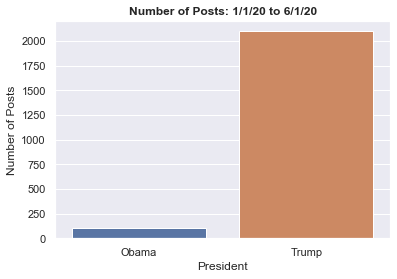

In [4]:
sns.barplot(['Obama', 'Trump'], [len(obama_df), len(trump_df)])
plt.xlabel('President')
plt.ylabel('Number of Posts')
plt.title('Number of Posts: 1/1/20 to 6/1/20', fontweight='bold')
plt.show()

This result is not at all surprising. 

### Who's tweets are more popular? AKA most re-tweets
consider the average number of retweets to normalize for the fact that Trumps way more often than Obama

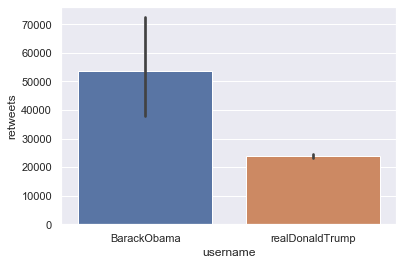

In [5]:
# merge into one data frame to make plotting easier
all_df = pd.concat([obama_df, trump_df])
ax = sns.barplot(x="username", y="retweets", data=all_df)

This is a surprising result. Obama gets >2X the amount of retweets than Trump but has a much larger standard deviation than Trump. Trump's low standard deviation could be a result of a strong fan base that supports his Tweets

### Clean text with natural language processing (NLTK Library)

check for package updates

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/dwhite7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dwhite7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Functions  to clean text and make a word cloud

In [7]:
def _clean_text(all_text, extra_stop_words=[], remove_stop_words=1, stem_words=1, remove_punctuation=1):

    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem.snowball import SnowballStemmer
    
    word_list = []
    all_text_clean = []
    for text in all_text:
        if isinstance(text, str):
            # make lower case 
            text = text.lower()
    
            # split into words and puncutation
            tokens = word_tokenize(text)
    
            # remove stop words
            stop_words = set(stopwords.words('english'))
            if len(extra_stop_words) > 0:
                stop_words.update(extra_stop_words)
            if remove_stop_words: 
                words = [w for w in tokens if not w in stop_words]
    
            # stem words
            if stem_words:
                stemmer = SnowballStemmer('english')
                words  = [stemmer.stem(word) for word in words]
    
            # remove punctuation
            if remove_punctuation:
                words = [word for word in words if word.isalpha()]
        
            sentence = ' '.join(words)
            
            # store 
            word_list.extend(words)
            all_text_clean.append(sentence)
     
    # store cleaned text in data frame 
    all_text_df = pd.DataFrame({'text':all_text_clean}, dtype='str')
    
    return all_text_df, word_list

In [8]:
def _plot_frequency(all_labels, norm=0, max_labels = 100, figure_size =[8,16],
                   xlabel='Frequency',ylabel='Items',title='Frequency of Items',
                   savefig=0, figname=[]): 
    # all_labels = unique values to be counted
    fdist = nltk.FreqDist(all_labels) 
    labels = np.array(list(fdist.keys()))
    counts = np.array(list(fdist.values()))
    # sort by descending 
    sorted_idx = np.argsort(-1*counts)
    counts_sorted = counts[sorted_idx]
    labels_sorted = labels[sorted_idx]
    
    if len(counts_sorted) > max_labels:
        counts_sorted = counts_sorted[0:max_labels]
        labels_sorted = labels_sorted[0:max_labels]
    
    if norm:
        counts_sorted = (counts_sorted)/np.sum(counts_sorted)
    
    # plot the figure 
    fig=plt.figure(figsize=(figure_size[0],figure_size[1])) 
    ax = sns.barplot(counts_sorted, labels_sorted)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    
    if savefig:
        fig.savefig(figname, bbox_inches="tight")
    
    return counts

In [9]:
def _make_word_cloud(obama_text, trump_text, num_rows=1, num_cols=2, plot_size=[12,24],
                    savefig=0, figname=[]):
    fig = plt.figure(figsize=(plot_size[0],plot_size[1]))
    names = ['Obama', 'Trump']
    for i in [0,1]:
        if i == 0:
            word_list = ' '.join(obama_text)
        else:
            word_list = ' '.join(trump_text)
        # make word cloud 
        wordcloud = WordCloud(width=1000, height=1000, 
                    background_color='white',
                    min_font_size=10,
                    random_state=1).generate(word_list)
        ax = fig.add_subplot(num_rows, num_cols, i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(names[i], fontsize=20, fontweight='bold')
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    
    if savefig:
        fig.savefig(figname, bbox_inches="tight")

#### Clean Text

In [10]:
obama_text_df, obama_word_list = _clean_text(obama_df['text'], stem_words=0)
trump_text_df, trump_word_list = _clean_text(trump_df['text'], stem_words=0)

#### Word Frequency

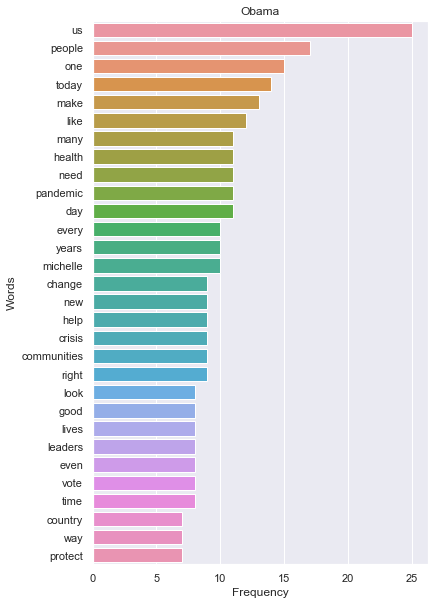

In [11]:
_plot_frequency(obama_word_list, norm=0, max_labels = 30, figure_size =[6,10],
                   xlabel='Frequency',ylabel='Words',title='Obama')
plt.show()

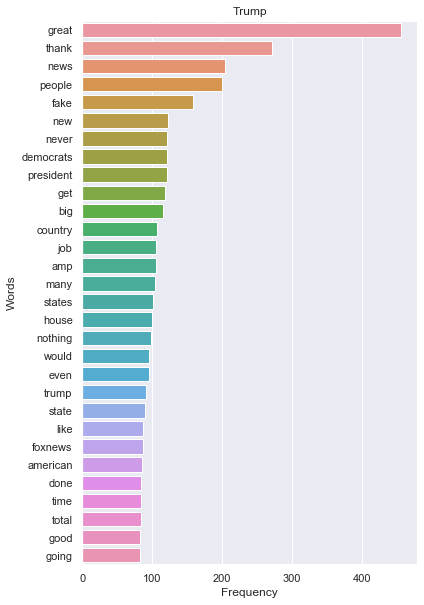

In [12]:
_plot_frequency(trump_word_list, norm=0, max_labels = 30, figure_size =[6,10],
                   xlabel='Frequency',ylabel='Words',title='Trump')
plt.show()

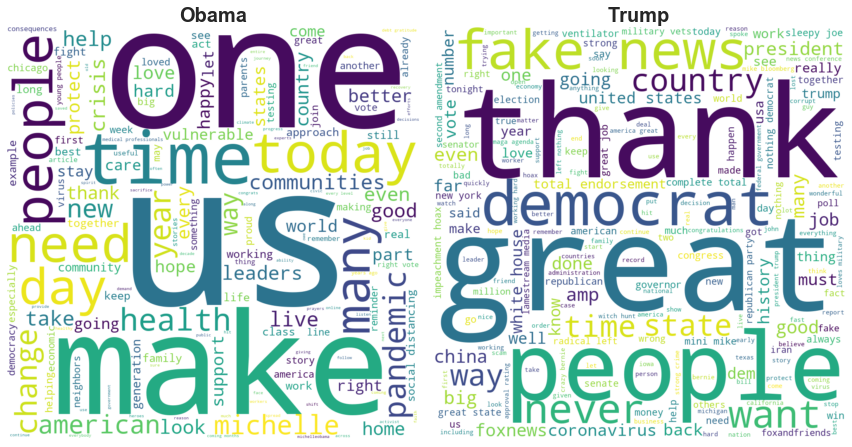

In [13]:
_make_word_cloud(obama_word_list, trump_word_list, plot_size=[12,24], savefig=1, figname='compare_wordcloud.png')